<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_1X/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(_0_8)_n60_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_1X/multiplication_delta_-0.8'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-0.8_n60.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,42.827428,-0.244185,52.583243,52.819177,-0.235934
1,0.0,1.0,46.454591,-0.285039,56.169553,56.441964,-0.272412
2,0.0,2.0,46.629474,0.297216,56.926690,56.616636,0.310054
3,0.0,3.0,74.215755,-0.196895,84.018860,84.169638,-0.150778
4,0.0,4.0,29.825004,-0.512357,39.312647,39.832438,-0.519791
...,...,...,...,...,...,...,...
59995,999.0,55.0,34.256459,0.181679,44.438139,44.198121,0.240018
59996,999.0,56.0,37.176047,0.073894,47.249941,47.123346,0.126595
59997,999.0,57.0,90.300330,-0.045888,100.254441,100.350207,-0.095765
59998,999.0,58.0,20.199463,0.288681,30.488144,30.113981,0.374162


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         e           Y       y_hat     e_hat
rep   index                                                       
0.0   0.0    42.827428 -0.244185   52.583243   52.819177 -0.235934
      1.0    46.454591 -0.285039   56.169553   56.441964 -0.272412
      2.0    46.629474  0.297216   56.926690   56.616636  0.310054
      3.0    74.215755 -0.196895   84.018860   84.169638 -0.150778
      4.0    29.825004 -0.512357   39.312647   39.832438 -0.519791
...                ...       ...         ...         ...       ...
999.0 55.0   34.256459  0.181679   44.438139   44.198121  0.240018
      56.0   37.176047  0.073894   47.249941   47.123346  0.126595
      57.0   90.300330 -0.045888  100.254441  100.350207 -0.095765
      58.0   20.199463  0.288681   30.488144   30.113981  0.374162
      59.0   70.509847 -0.032999   80.476848   80.521510 -0.044662

[60000 rows x 5 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         e           Y       y_hat     e_hat
rep   index                                                       
0.0   0.0    42.827428 -0.244185   52.583243   52.819177 -0.235934
      1.0    46.454591 -0.285039   56.169553   56.441964 -0.272412
      2.0    46.629474  0.297216   56.926690   56.616636  0.310054
      3.0    74.215755 -0.196895   84.018860   84.169638 -0.150778
      4.0    29.825004 -0.512357   39.312647   39.832438 -0.519791
...                ...       ...         ...         ...       ...
999.0 55.0   34.256459  0.181679   44.438139   44.198121  0.240018
      56.0   37.176047  0.073894   47.249941   47.123346  0.126595
      57.0   90.300330 -0.045888  100.254441  100.350207 -0.095765
      58.0   20.199463  0.288681   30.488144   30.113981  0.374162
      59.0   70.509847 -0.032999   80.476848   80.521510 -0.044662

[60000 rows x 5 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,42.827428,-0.244185,52.583243,52.819177,-0.235934
1,0.0,1.0,46.454591,-0.285039,56.169553,56.441964,-0.272412
2,0.0,2.0,46.629474,0.297216,56.926690,56.616636,0.310054
3,0.0,3.0,74.215755,-0.196895,84.018860,84.169638,-0.150778
4,0.0,4.0,29.825004,-0.512357,39.312647,39.832438,-0.519791
...,...,...,...,...,...,...,...
59995,999.0,55.0,34.256459,0.181679,44.438139,44.198121,0.240018
59996,999.0,56.0,37.176047,0.073894,47.249941,47.123346,0.126595
59997,999.0,57.0,90.300330,-0.045888,100.254441,100.350207,-0.095765
59998,999.0,58.0,20.199463,0.288681,30.488144,30.113981,0.374162


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         e           Y       y_hat     e_hat
rep   index                                                       
0.0   0.0    42.827428 -0.244185   52.583243   52.819177 -0.235934
      1.0    46.454591 -0.285039   56.169553   56.441964 -0.272412
      2.0    46.629474  0.297216   56.926690   56.616636  0.310054
      3.0    74.215755 -0.196895   84.018860   84.169638 -0.150778
      4.0    29.825004 -0.512357   39.312647   39.832438 -0.519791
...                ...       ...         ...         ...       ...
999.0 55.0   34.256459  0.181679   44.438139   44.198121  0.240018
      56.0   37.176047  0.073894   47.249941   47.123346  0.126595
      57.0   90.300330 -0.045888  100.254441  100.350207 -0.095765
      58.0   20.199463  0.288681   30.488144   30.113981  0.374162
      59.0   70.509847 -0.032999   80.476848   80.521510 -0.044662

[60000 rows x 5 columns]

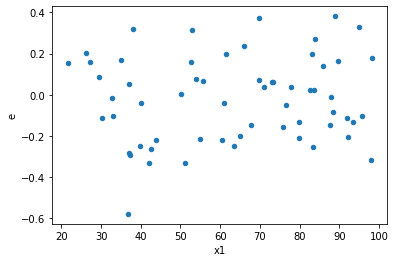

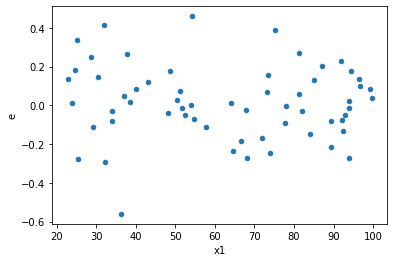

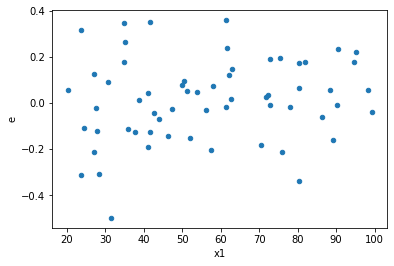

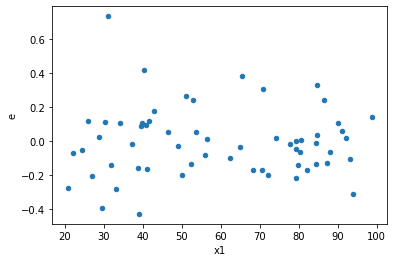

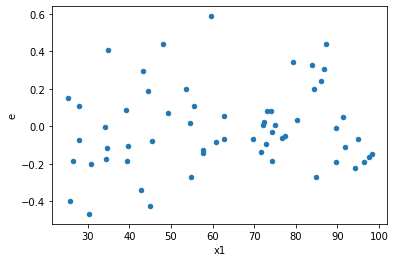

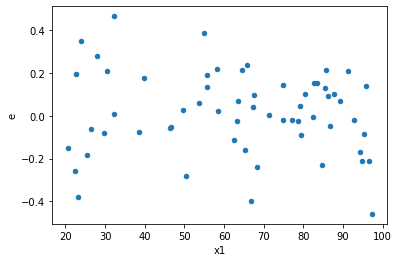

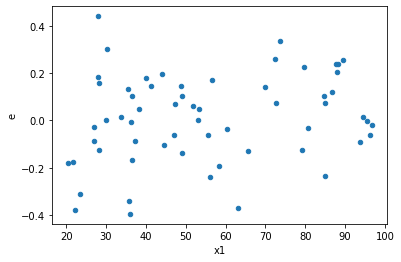

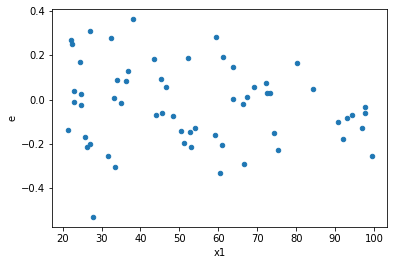

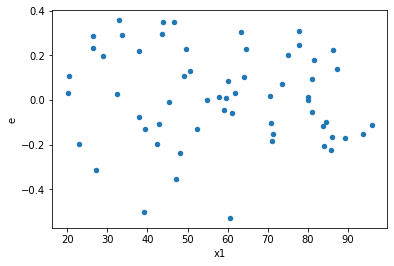

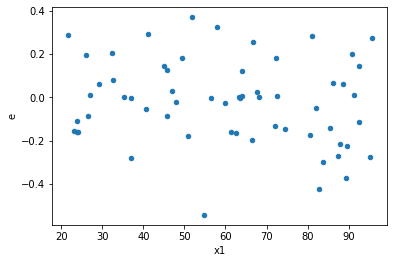

In [11]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x1', y='e', kind = 'scatter')
tablenew1.plot(x ='x1', y='e', kind = 'scatter')
tablenew2.plot(x ='x1', y='e', kind = 'scatter')
tablenew3.plot(x ='x1', y='e', kind = 'scatter')
tablenew4.plot(x ='x1', y='e', kind = 'scatter')
tablenew5.plot(x ='x1', y='e', kind = 'scatter')
tablenew6.plot(x ='x1', y='e', kind = 'scatter')
tablenew7.plot(x ='x1', y='e', kind = 'scatter')
tablenew8.plot(x ='x1', y='e', kind = 'scatter')
tablenew9.plot(x ='x1', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
3.0,26.0,32.0,1.026727481051775,1.962566378049988,0.039489518501991346,0.061330199314062125,1.553075389130648,0.2356287070910854,0.8821856464544573,0.1178143535455427,Reject005=1 : Homoscedasticity
5.0,33.0,25.0,0.7836933756083841,1.1115366529733097,0.023748284109344975,0.04446146611893239,1.8721969938635168,0.10851767717687189,0.9457411614115641,0.05425883858843594,Reject005=1 : Homoscedasticity
6.0,19.0,39.0,0.4468756988219753,1.6804656712191375,0.023519773622209226,0.04308886336459327,1.832027129882975,0.10847060698343669,0.9457646965082817,0.054235303491718345,Reject005=1 : Homoscedasticity
9.0,32.0,26.0,1.0720804307674623,0.9847830591033461,0.0335025134614832,0.03787627150397485,1.1305501465590047,0.7549939338142884,0.6225030330928558,0.3774969669071442,Reject005=1 : Homoscedasticity
11.0,31.0,27.0,0.823359769086117,1.2358799486395615,0.026559992551165063,0.04577333143109487,1.7233939860079897,0.15460907186547823,0.9226954640672609,0.07730453593273912,Reject005=1 : Homoscedasticity
17.0,25.0,33.0,0.5688209395053981,1.297000483718685,0.022752837580215925,0.039303044961172276,1.7273909165223025,0.14109101269288438,0.9294544936535578,0.07054550634644219,Reject005=1 : Homoscedasticity
19.0,33.0,25.0,1.186692863297469,0.9814170137066272,0.035960389796893,0.03925668054826509,1.0916644888998643,0.8305152869777299,0.584742356511135,0.41525764348886496,Reject005=1 : Homoscedasticity
20.0,29.0,29.0,1.2758743012726528,1.2821221187520586,0.043995665561125955,0.044211107543174435,1.0048968910755345,0.9895957057519245,0.5052021471240378,0.49479785287596223,Reject005=1 : Homoscedasticity
29.0,28.0,30.0,1.0225593952853402,2.2601392616503326,0.03651997840304787,0.07533797538834443,2.0629249710086603,0.05440577604261332,0.9727971119786933,0.02720288802130666,Reject005=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,32.0,26.0,1.569883261818727,0.43747274205176073,0.04905885193183522,0.01682587469429849,0.3429732664285986,0.004505991750231077,Reject005=0 : Heteroscedasticity
1.0,31.0,27.0,1.1748529020472167,0.8049446087856589,0.03789848071120054,0.029812763288357736,0.7866479797842358,0.5165524698438273,Reject005=1 : Homoscedasticity
2.0,35.0,23.0,1.6732442228809554,0.7767930493977449,0.047806977796598725,0.03377361084338021,0.7064577683005736,0.34597637436204176,Reject005=1 : Homoscedasticity
3.0,26.0,32.0,1.026727481051775,1.962566378049988,0.039489518501991346,0.061330199314062125,1.553075389130648,0.2356287070910854,Reject005=1 : Homoscedasticity
4.0,32.0,26.0,1.2474203988410482,1.009832019034751,0.038981887463782755,0.03883969303979811,0.9963522950468534,0.9819351133824381,Reject005=1 : Homoscedasticity
5.0,33.0,25.0,0.7836933756083841,1.1115366529733097,0.023748284109344975,0.04446146611893239,1.8721969938635168,0.10851767717687189,Reject005=1 : Homoscedasticity
6.0,19.0,39.0,0.4468756988219753,1.6804656712191375,0.023519773622209226,0.04308886336459327,1.832027129882975,0.10847060698343669,Reject005=1 : Homoscedasticity
7.0,28.0,30.0,1.5194736371820912,0.9905939628281921,0.05426691561364611,0.03301979876093974,0.6084701587984943,0.1899308490996581,Reject005=1 : Homoscedasticity
8.0,21.0,37.0,2.1416840086721445,0.8131392965790459,0.10198495279391165,0.02197673774537962,0.21549000262606974,0.0004322347530997788,Reject005=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      660
Reject005=0 : Heteroscedasticity    340
Name: Result_test, dtype: int64